# Naive Bayes Classification

In [26]:
import math
import random
import pandas as pd
import numpy as npy

Encode function

In [27]:
def encode_class(data):
  classes = []
  for i in range(len(data)):
    if data[i][-1] not in classes:
      classes.append(data[i][-1])
    
  for i in range(len(classes)):
    for j in range(len(data)):
      if data[j][-1] == classes[i]:
        data[j][-1] = i
  
  return data

3. splitting the dataset

In [28]:
def splitting(data, ratio):
  train_num = int(len(data) * ratio)
  train = []

  test = list(data)

  while len(train) < train_num:
    index = random.randrange(len(test))
    train.append(test.pop(index))
  
  return train, test

4. Grouping Data by Class

In [29]:
def groupUnderClass(data):
  data_dict = {}
  for i in range(len(data)):
    if data[i][-1] not in data_dict:
      data_dict[data[i][-1]] = []
    data_dict[data[i][-1]].append(data[i])
  
  return data_dict

5. Calculating Mean and Standard Deviation for Class

In [30]:
def MeanAndStdDev(numbers):
  avg = npy.mean(numbers)
  stddev = npy.std(numbers)
  return avg, stddev

def MeanAndStdDevForClass(mydata):
  info = {}
  data_dict = groupUnderClass(mydata)
  for classValue, instances in data_dict.items():
    info[classValue] = [MeanAndStdDev(attribute) for attribute in zip(*instances)]
  return info

6. Calculating Gaussian Probability Density Function

In [31]:
def calculateGaussian(x, mean, stdev):
  epsilon = 1e-10
  expo = math.exp(-(math.pow(x-mean, 2) / (2 * math.pow(stdev+epsilon, 2))))
  return (1 / (math.sqrt(2 * math.pi) * (stdev+epsilon))) * expo

def calculateClassProbability(info, test):
  probabilites = {}
  for calssValue, classSummaries in info.items():
    probabilites[calssValue] = 1
    for i in range(len(classSummaries)):
      mean, std_dev = classSummaries[i]
      x = test[i]
      probabilites[calssValue] *= calculateGaussian(x, mean, std_dev)
  return probabilites

In [32]:
def predict(info, test):
  probabilities = calculateClassProbability(info, test)
  bestLabel = max(probabilities, key=probabilities.get)
  return bestLabel

def getPredictions(info, test):
  predictions = [predict(info, instance) for instance in test]
  return predictions

8. Accuracy Calculation

In [33]:
def accuracy_rate(test, predictions):
  correct = sum(1 for i in range(len(test)) if test[i][-1] == predictions[i])
  return (correct / float(len(test))) * 100.0

In [34]:
df = pd.read_csv('diabetes.csv', header=0)
mydata = df.values.tolist()

mydata = encode_class(mydata)
for i in range(len(mydata)):
  for j in range(len(mydata[i]) - 1):
    mydata[i][j] = float(mydata[i][j])

10. Splitting Data into Training and Testing Sets

In [35]:
ratio = 0.7
train_data, test_data = splitting(mydata, ratio)

print('Total number of examples:', len(mydata))
print('Training examples:', len(train_data))
print('Test examples:', len(test_data))

Total number of examples: 1000
Training examples: 700
Test examples: 300


11. Training and Testing the Model

In [36]:
info = MeanAndStdDevForClass(train_data)

predictions = getPredictions(info, test_data)
accuracy = accuracy_rate(test_data, predictions)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 100.0


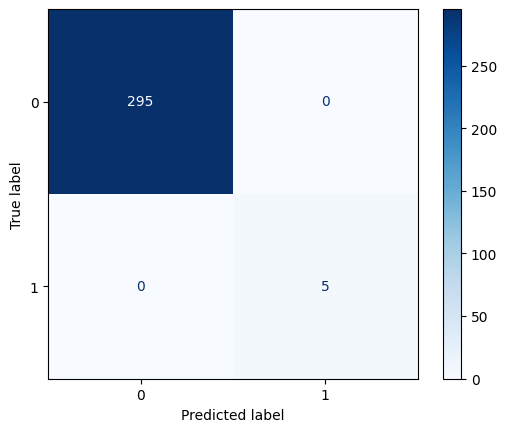

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = [row[-1] for row in test_data]
y_pred = predictions

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

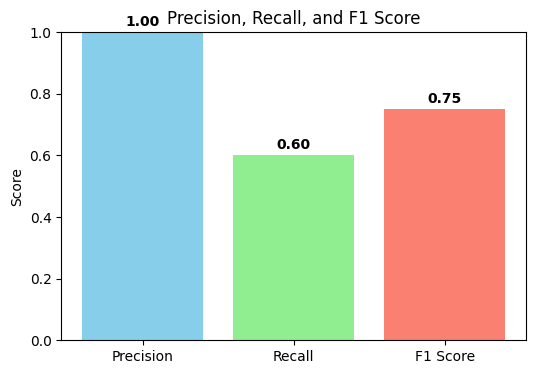

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

actual = [0, 1, 1, 0, 1, 0, 1, 1]
predicted = [0, 1, 0, 0, 1, 0, 1, 0]

precision = precision_score(actual, predicted)
recall = recall_score(actual, predicted)
f1 = f1_score(actual, predicted)

metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
    
plt.show()